# E-Commerce Customer Segmentation Analysis

This project analyzes customer behavior data to identify engagement patterns and create actionable customer segments for targeted marketing.

## Project Overview

This analysis focuses on customer segmentation using behavioral and transactional data from an e-commerce platform. The goal is to identify distinct customer groups and provide actionable insights for targeted marketing strategies.

### Key Metrics: RFM Analysis

We'll use **RFM analysis** as the foundation for segmentation:

- **Recency**: How recently a customer made a purchase (days since last order)
- **Frequency**: How often a customer purchases (total number of orders)
- **Monetary**: How much a customer spends (total revenue generated)

RFM metrics are industry-standard for understanding customer value and predicting future behavior. High-value customers typically have low recency (purchased recently), high frequency (purchase often), and high monetary value (spend more).

## 1. Import Libraries

In [ ]:
import pandas as pd
import numpy as np

## 2. Load and Explore Data

First, let's load the dataset and get a sense of its structure, data types, and basic statistics.

In [ ]:
df = pd.read_csv("data/ecommerce_user_segmentation.csv")

print(f"Shape: {df.shape}")
print(df.head())
print(df.info())
print(df.describe())

Shape: (10000, 14)
  Customer_ID  Recency  Frequency  Monetary  Avg_Order_Value  Session_Count  \
0   CUST00001       51         13      1560              113             56   
1   CUST00002      134          5         3               26              7   
2   CUST00003       55         15       235               57             37   
3   CUST00004       46         11      1293              191             48   
4   CUST00005       21         30      3602              239             90   

   Avg_Session_Duration  Pages_Viewed  Clicks  Campaign_Response  \
0             14.766242            33     828                  1   
1              5.409044             2      60                  0   
2              5.082231            11     710                  1   
3             18.936486            20    1223                  0   
4             26.461395            37    1892                  0   

   Wishlist_Adds  Cart_Abandon_Rate  Returns Segment_Label  
0             28          17.629489 

## 3. Data Quality Assessment

Checking for missing values, duplicates, and data type issues.

In [ ]:
print(f"\nMissing values:\n{df.isnull().sum()}")
print(f"Duplicates found: {df.duplicated().sum()}")

df = df.drop_duplicates()

numeric_cols = ['Recency','Frequency','Monetary','Avg_Order_Value','Session_Count',
                'Avg_Session_Duration','Pages_Viewed','Clicks','Wishlist_Adds',
                'Cart_Abandon_Rate','Returns']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print(f"\nData types confirmed. Shape: {df.shape}")


Missing values:
Customer_ID             0
Recency                 0
Frequency               0
Monetary                0
Avg_Order_Value         0
Session_Count           0
Avg_Session_Duration    0
Pages_Viewed            0
Clicks                  0
Campaign_Response       0
Wishlist_Adds           0
Cart_Abandon_Rate       0
Returns                 0
Segment_Label           0
dtype: int64
Duplicates found: 0

Data types confirmed. Shape: (10000, 14)


## 4. Outlier Treatment

Capping extreme values at the 99th percentile to prevent outliers from skewing our analysis while preserving the overall data distribution.

In [ ]:
for col in numeric_cols:
    upper = df[col].quantile(0.99)
    df[col] = np.clip(df[col], 0, upper)

print(f"Capped outliers at 99th percentile for {len(numeric_cols)} columns")

Capped outliers at 99th percentile for 11 columns


## Assumptions & Limitations

**Outlier Treatment**: Values capped at 99th percentile. This preserves 99% of data distribution while preventing extreme outliers from skewing analysis. Alternative approaches (removal, log transformation) were considered but capping maintains sample size.

**Engagement Score**: Simple additive score (Clicks + Wishlist + Sessions) assumes equal weight for each action. A weighted score based on conversion impact could be more sophisticated but requires additional business context.

**Missing Data**: No missing values detected in this dataset. In production, would need strategy for handling incomplete records.

## 5. Standardize Categorical Variables

Converting categorical columns to lowercase and removing whitespace for consistency in analysis.

In [ ]:
df['Campaign_Response'] = df['Campaign_Response'].astype(str).str.lower().str.strip()
df['Segment_Label'] = df['Segment_Label'].astype(str).str.lower().str.strip()

## 6. Feature Engineering

Creating an engagement score by combining three key interaction metrics: clicks, wishlist adds, and session count. Users are then categorized into Low, Medium, and High engagement levels using quantile-based binning to ensure balanced groups.

In [ ]:
df['Engagement_Score'] = df['Clicks'] + df['Wishlist_Adds'] + df['Session_Count']

print(f"\nEngagement Score statistics:")
print(df['Engagement_Score'].describe())

df['Engagement_Level'] = pd.qcut(df['Engagement_Score'], q=3, 
                                  labels=['Low','Medium','High'], 
                                  duplicates='drop')

print(f"\nEngagement level distribution:\n{df['Engagement_Level'].value_counts()}")


Engagement Score statistics:
count    10000.000000
mean      1294.468900
std       1111.694174
min         54.000000
25%        487.000000
50%        943.500000
75%       1660.500000
max       4969.050000
Name: Engagement_Score, dtype: float64

Engagement level distribution:
Engagement_Level
Medium    4547
High      2888
Low       2565
Name: count, dtype: int64


## 7. Export Cleaned Data

Saving the processed dataset for visualization and modeling.

In [ ]:
df.to_csv("data/ecommerce_user_behavior_cleaned.csv", index=False)
print(f"\nCleaned data saved: {df.shape[0]} rows, {df.shape[1]} columns")


Cleaned data saved: 10000 rows, 16 columns


<br>
<br>

---
---

# Part 2: Exploratory Data Analysis

Now that the data is cleaned, let's visualize key patterns and distributions to understand customer behavior.

---

## 1. Load Cleaned Data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/ecommerce_user_behavior_cleaned.csv")

print(f"Loaded {df.shape[0]} rows for visualization")

Loaded 10000 rows for visualization


## 2. Engagement Score Distribution

Looking at how engagement scores are distributed across our customer base. This helps us understand if most customers are highly engaged or if engagement is more varied.

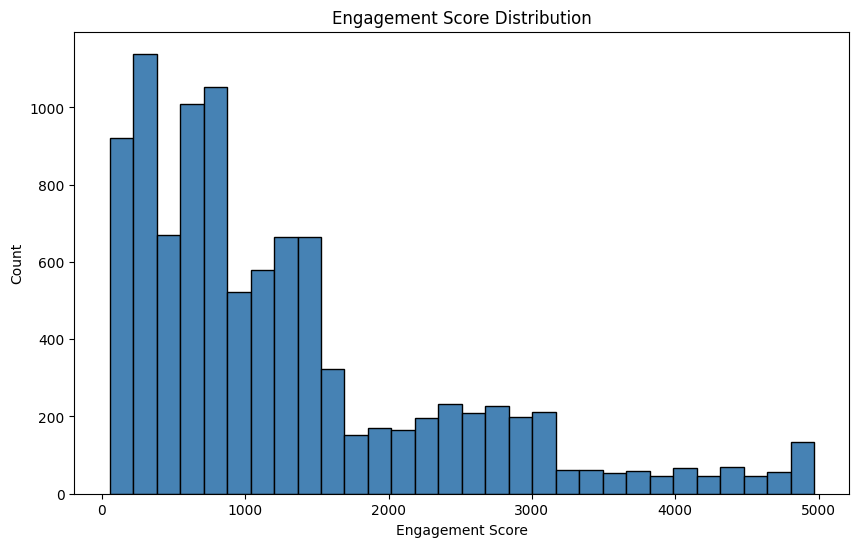

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df['Engagement_Score'], bins=30, edgecolor='black', color='steelblue')
plt.xlabel("Engagement Score")
plt.ylabel("Count")
plt.title("Engagement Score Distribution")
plt.savefig("images/engagement_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

## 3. Engagement Level Breakdown

Visualizing how customers are distributed across our three engagement tiers: Low, Medium, and High.

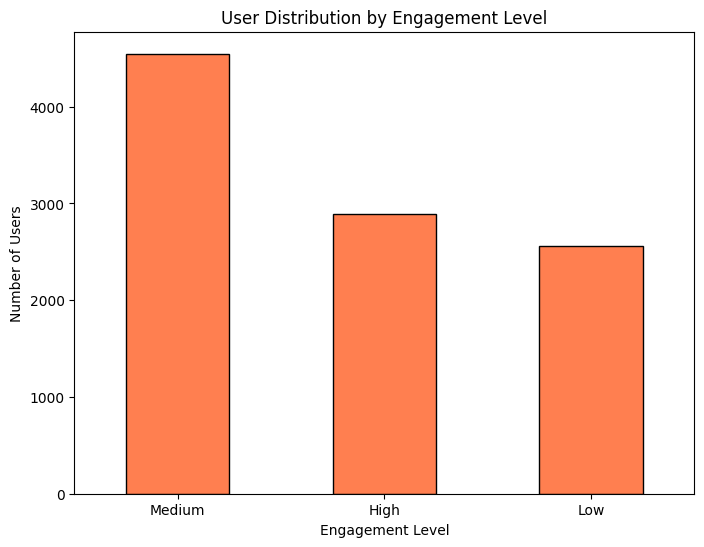

In [ ]:
plt.figure(figsize=(8,6))
df['Engagement_Level'].value_counts().plot(kind='bar', color='coral', edgecolor='black')
plt.xlabel("Engagement Level")
plt.ylabel("Number of Users")
plt.title("User Distribution by Engagement Level")
plt.xticks(rotation=0)
plt.savefig("images/engagement_levels.png", dpi=300, bbox_inches='tight')
plt.show()

## 4. RFM Metric Distributions

Examining the core RFM metrics that drive customer value:
- **Recency**: How recently customers made a purchase
- **Frequency**: How often they purchase
- **Monetary**: How much they spend

These distributions help identify patterns in customer behavior and potential segments.

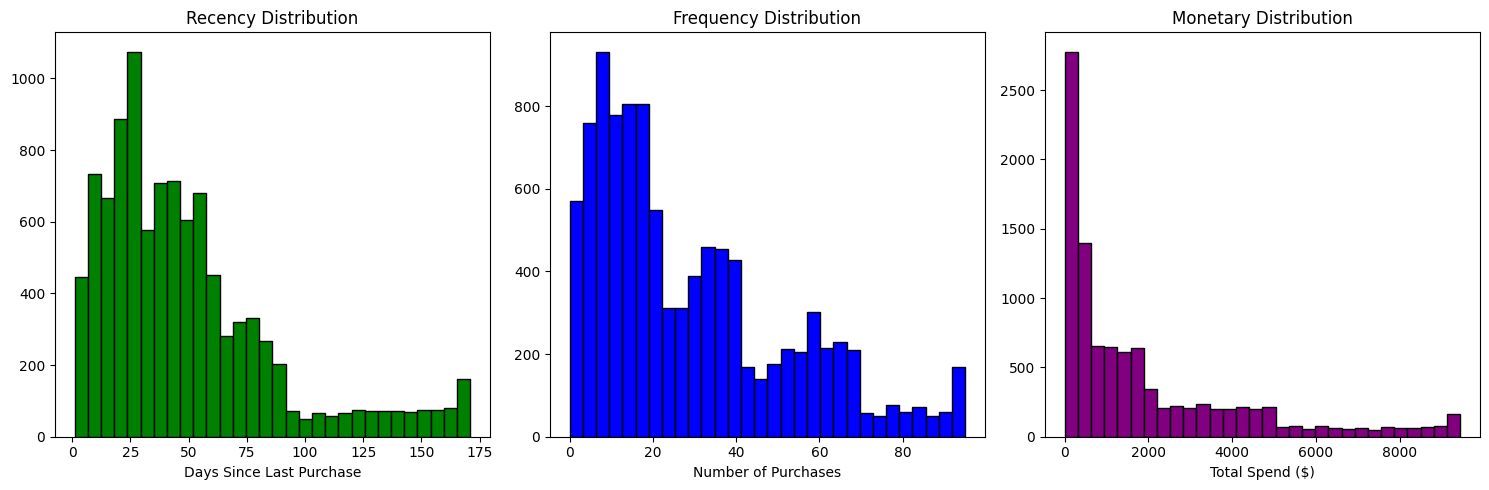

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].hist(df['Recency'], bins=30, color='green', edgecolor='black')
axes[0].set_title("Recency Distribution")
axes[0].set_xlabel("Days Since Last Purchase")

axes[1].hist(df['Frequency'], bins=30, color='blue', edgecolor='black')
axes[1].set_title("Frequency Distribution")
axes[1].set_xlabel("Number of Purchases")

axes[2].hist(df['Monetary'], bins=30, color='purple', edgecolor='black')
axes[2].set_title("Monetary Distribution")
axes[2].set_xlabel("Total Spend ($)")

plt.tight_layout()
plt.savefig("images/rfm_distributions.png", dpi=300, bbox_inches='tight')
plt.show()

<br>
<br>

---
---

# Part 3: Correlation Analysis

Understanding relationships between features helps identify which metrics move together and informs our segmentation strategy.

---

## 1. Feature Correlation Heatmap

Examining correlations between numeric features to understand which customer behaviors and metrics are related.

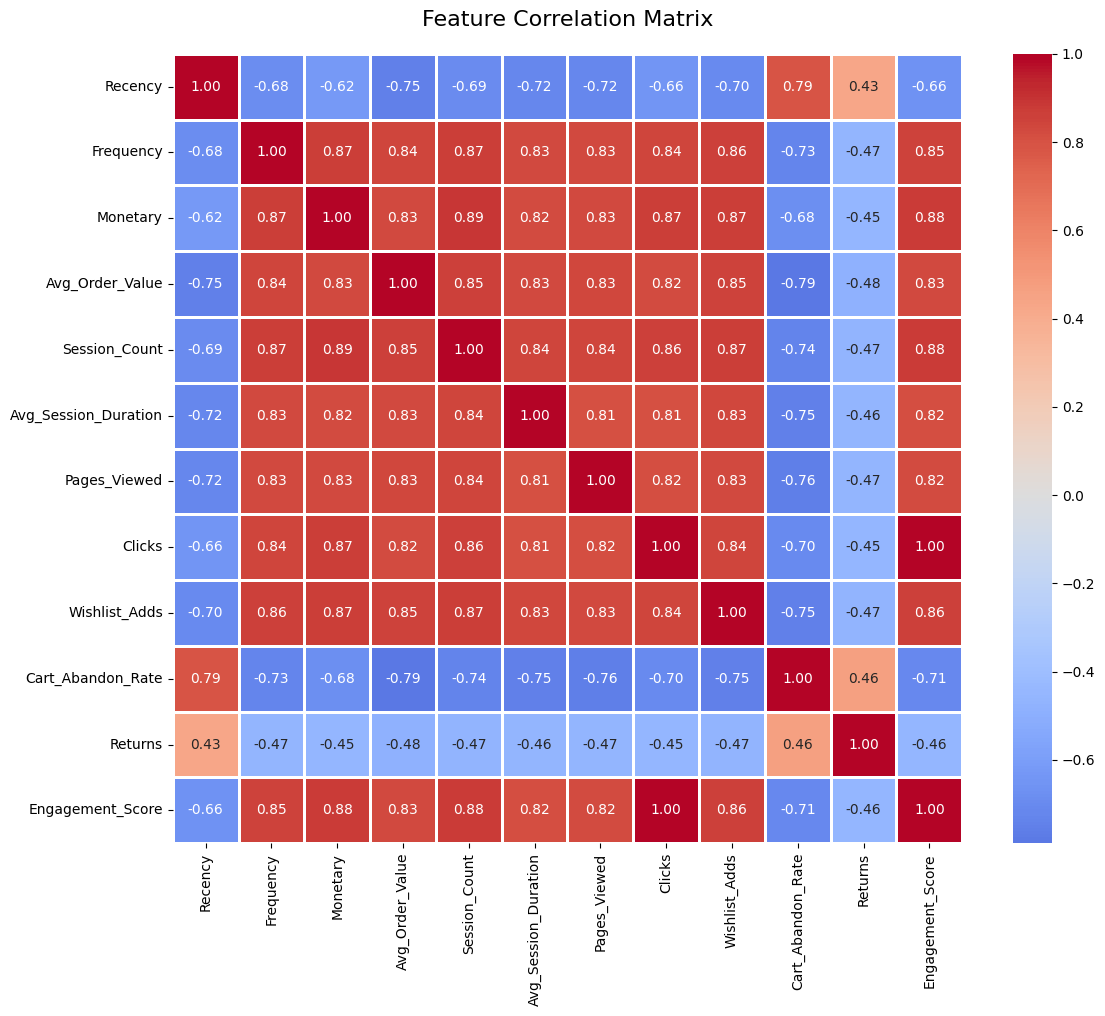

In [ ]:

correlation_cols = ['Recency', 'Frequency', 'Monetary', 'Avg_Order_Value', 
                    'Session_Count', 'Avg_Session_Duration', 'Pages_Viewed', 
                    'Clicks', 'Wishlist_Adds', 'Cart_Abandon_Rate', 'Returns',
                    'Engagement_Score']

corr_matrix = df[correlation_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title("Feature Correlation Matrix", fontsize=16, pad=20)
plt.tight_layout()
plt.savefig("images/correlation_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

## 2. Identifying Key Relationships

Let's examine the strongest correlations to understand what drives customer value and engagement.

In [ ]:

corr_pairs = corr_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs < 1]  
top_corr = corr_pairs.abs().sort_values(ascending=False).head(10)

print("Top 10 Feature Correlations:")
print(top_corr)

Top 10 Feature Correlations:
Clicks            Engagement_Score    0.999628
Engagement_Score  Clicks              0.999628
Session_Count     Monetary            0.892209
Monetary          Session_Count       0.892209
                  Engagement_Score    0.879406
Engagement_Score  Monetary            0.879406
                  Session_Count       0.876864
Session_Count     Engagement_Score    0.876864
Monetary          Clicks              0.871514
Clicks            Monetary            0.871514
dtype: float64


## 3. RFM Metric Relationships

Since RFM metrics are central to customer segmentation, let's visualize their relationships more closely.

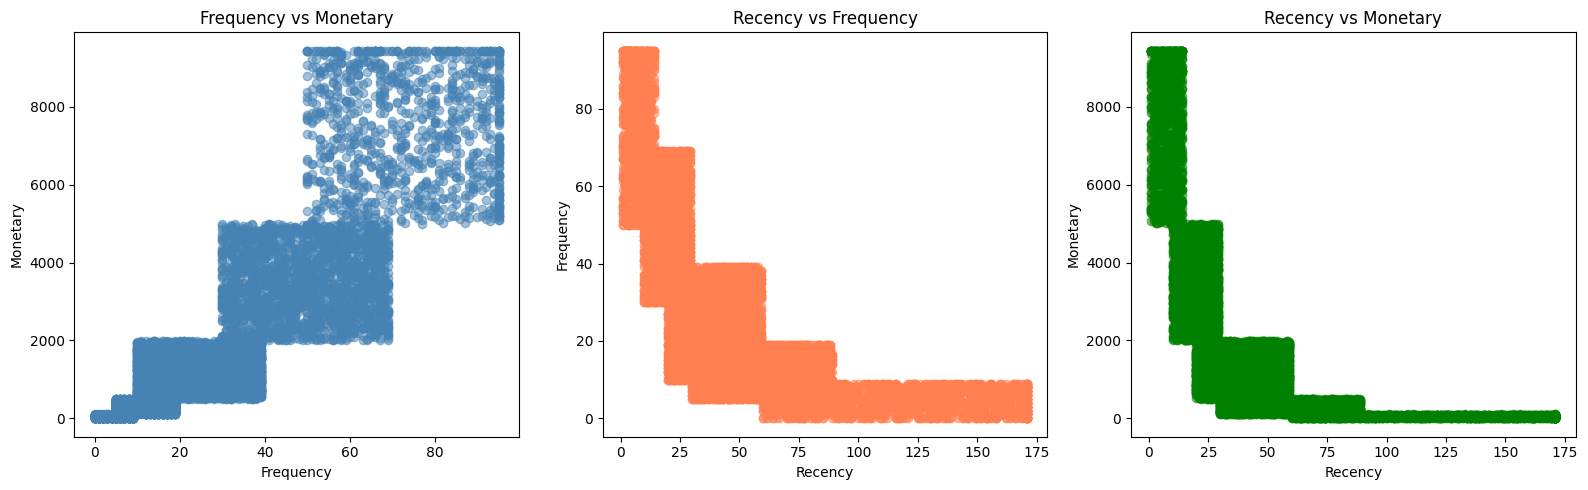

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Frequency vs Monetary
axes[0].scatter(df['Frequency'], df['Monetary'], alpha=0.5, color='steelblue')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Monetary')
axes[0].set_title('Frequency vs Monetary')

# Recency vs Frequency
axes[1].scatter(df['Recency'], df['Frequency'], alpha=0.5, color='coral')
axes[1].set_xlabel('Recency')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Recency vs Frequency')

# Recency vs Monetary
axes[2].scatter(df['Recency'], df['Monetary'], alpha=0.5, color='green')
axes[2].set_xlabel('Recency')
axes[2].set_ylabel('Monetary')
axes[2].set_title('Recency vs Monetary')

plt.tight_layout()
plt.savefig("images/rfm_relationships.png", dpi=300, bbox_inches='tight')
plt.show()

## 4. Engagement Score vs Customer Value

Exploring how engagement relates to customer spending and purchase behavior.

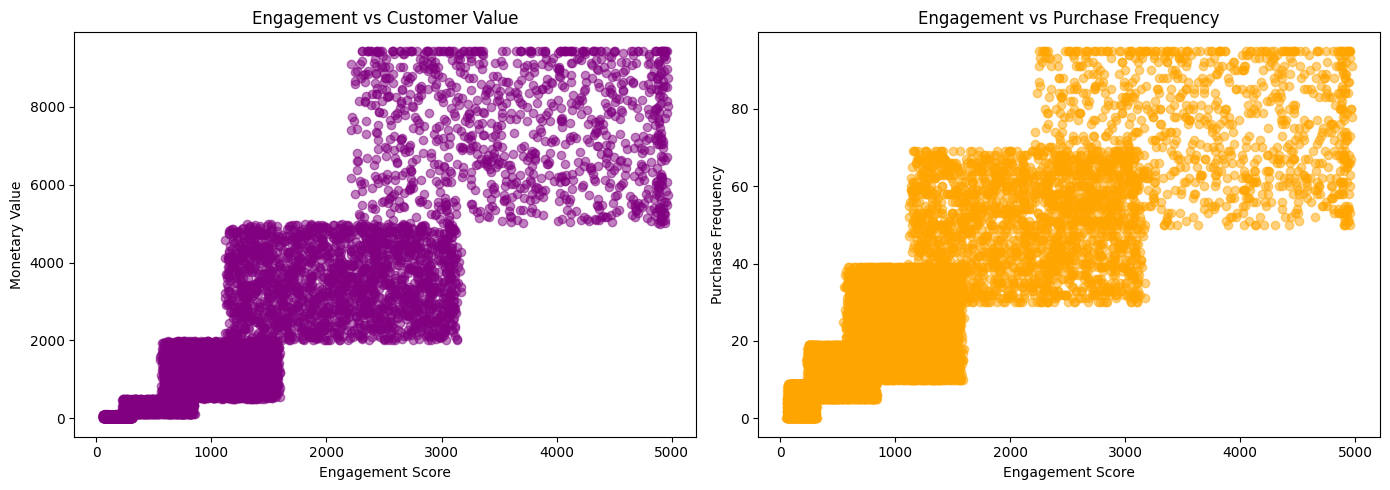

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Engagement vs Monetary
axes[0].scatter(df['Engagement_Score'], df['Monetary'], alpha=0.5, color='purple')
axes[0].set_xlabel('Engagement Score')
axes[0].set_ylabel('Monetary Value')
axes[0].set_title('Engagement vs Customer Value')

# Engagement vs Frequency
axes[1].scatter(df['Engagement_Score'], df['Frequency'], alpha=0.5, color='orange')
axes[1].set_xlabel('Engagement Score')
axes[1].set_ylabel('Purchase Frequency')
axes[1].set_title('Engagement vs Purchase Frequency')

plt.tight_layout()
plt.savefig("images/engagement_relationships.png", dpi=300, bbox_inches='tight')
plt.show()

<br>
<br>

---
---

# Part 4: Customer Segmentation with K-Means Clustering

Using K-Means clustering on RFM features to identify distinct customer segments based on their purchase behavior and value.

---

## 1. Prepare Data for Clustering

Selecting RFM features and standardizing them so all metrics are on the same scale. For Recency, we invert the values so that lower recency (more recent purchases) aligns directionally with higher frequency and monetary values.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df['Recency_Inverted'] = df['Recency'].max() - df['Recency']

rfm_features = ['Recency_Inverted', 'Frequency', 'Monetary']
X = df[rfm_features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Clustering on {X_scaled.shape[0]} customers using {len(rfm_features)} features")

Clustering on 10000 customers using 3 features


## 2. Determine Optimal Number of Clusters

Using the elbow method to find the best number of customer segments. We'll plot inertia (within-cluster sum of squares) for different values of k.

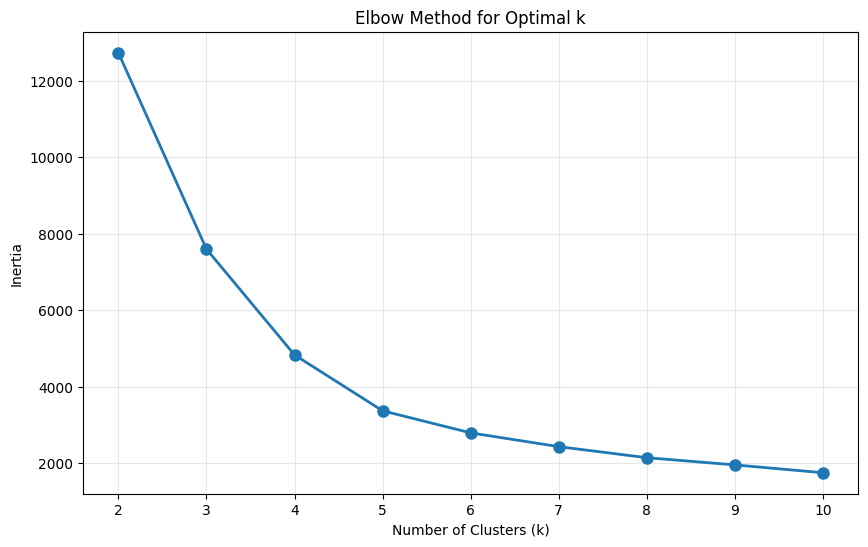

In [ ]:
inertias = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, marker='o', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True, alpha=0.3)
plt.savefig("images/elbow_curve.png", dpi=300, bbox_inches='tight')
plt.show()

## 3. Apply K-Means Clustering

Based on the elbow curve, we'll use k=4 clusters to segment our customers into distinct groups.

In [ ]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print(f"Customers segmented into {optimal_k} clusters")
print(f"\nCluster distribution:")
print(df['Cluster'].value_counts().sort_index())

Customers segmented into 4 clusters

Cluster distribution:
Cluster
0    1082
1    2190
2    5755
3     973
Name: count, dtype: int64


## 4. Visualize Customer Segments

Plotting clusters in 2D space using the two most important RFM dimensions: Frequency vs Monetary value.

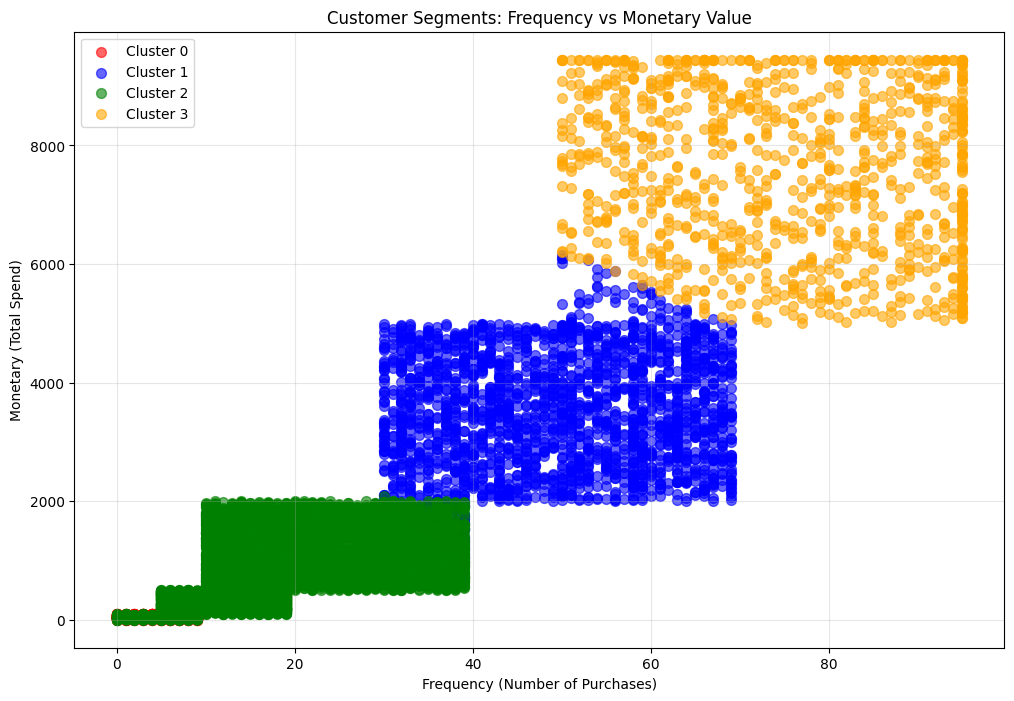

In [ ]:
plt.figure(figsize=(12, 8))

colors = ['red', 'blue', 'green', 'orange', 'purple']
for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Frequency'], cluster_data['Monetary'], 
                label=f'Cluster {cluster}', alpha=0.6, s=50, color=colors[cluster])

plt.xlabel('Frequency (Number of Purchases)')
plt.ylabel('Monetary (Total Spend)')
plt.title('Customer Segments: Frequency vs Monetary Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig("images/customer_segments.png", dpi=300, bbox_inches='tight')
plt.show()

## 5. 3D Cluster Visualization

Viewing all three RFM dimensions together to better understand how clusters separate in the full feature space.

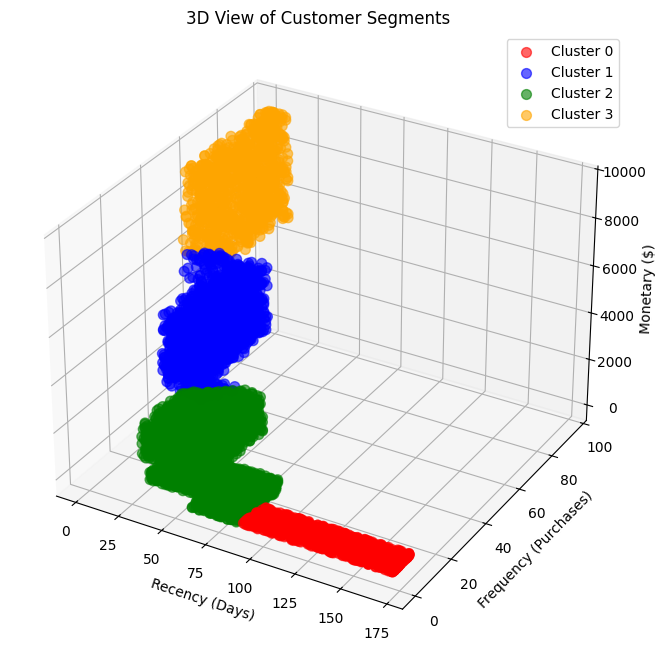

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    ax.scatter(cluster_data['Recency'], cluster_data['Frequency'], 
               cluster_data['Monetary'], label=f'Cluster {cluster}', 
               alpha=0.6, s=50, color=colors[cluster])

ax.set_xlabel('Recency (Days)')
ax.set_ylabel('Frequency (Purchases)')
ax.set_zlabel('Monetary ($)')
ax.set_title('3D View of Customer Segments')
ax.legend()
plt.savefig("images/customer_segments_3d.png", dpi=300, bbox_inches='tight')
plt.show()

<br>
<br>

---
---

# Part 5: Segment Analysis & Profiling

Analyzing the characteristics of each cluster to understand what makes each customer segment unique and assign meaningful business labels.

---

## 1. Cluster Characteristics

Examining the average RFM values for each segment to understand their behavior patterns.

In [ ]:
cluster_profile = df.groupby('Cluster')[rfm_features].mean().round(2)
print("Average RFM Values by Cluster:")
print(cluster_profile)
print(f"\nCluster sizes:")
print(df['Cluster'].value_counts().sort_index())

Average RFM Values by Cluster:
         Recency  Frequency  Monetary
Cluster                              
0         135.01       4.58     49.26
1          19.54      49.11   3465.22
2          50.41      17.76    755.00
3           7.49      74.90   7574.01

Cluster sizes:
Cluster
0    1082
1    2190
2    5755
3     973
Name: count, dtype: int64


## 2. Extended Segment Profile

Looking beyond RFM to understand engagement and behavioral patterns within each segment.

In [ ]:
extended_features = ['Recency', 'Frequency', 'Monetary', 'Avg_Order_Value',
                     'Engagement_Score', 'Session_Count', 'Cart_Abandon_Rate', 'Returns']

extended_profile = df.groupby('Cluster')[extended_features].mean().round(2)
print("Extended Profile by Cluster:")
print(extended_profile)

Extended Profile by Cluster:
         Recency  Frequency  Monetary  Avg_Order_Value  Engagement_Score  \
Cluster                                                                    
0         135.01       4.58     49.26            28.67            185.83   
1          19.54      49.11   3465.22           221.55           2116.17   
2          50.41      17.76    755.00           114.33            788.54   
3           7.49      74.90   7574.01           298.87           3670.23   

         Session_Count  Cart_Abandon_Rate  Returns  
Cluster                                             
0                 9.49              35.14    11.76  
1                88.91              10.02     4.55  
2                36.36              19.39     8.34  
3               148.50               4.99     2.02  


## 3. Assign Business Labels

Based on the RFM and behavioral characteristics, we'll assign descriptive names to each segment that reflect their value and engagement patterns.

In [ ]:
segment_names = {
    0: 'At-Risk Customers',
    1: 'High-Value Loyalists', 
    2: 'Promising Regulars',
    3: 'VIP Champions'
}

df['Segment_Name'] = df['Cluster'].map(segment_names)

print("Segment distribution:")
print(df['Segment_Name'].value_counts())

Segment distribution:
Segment_Name
Promising Regulars      5755
High-Value Loyalists    2190
At-Risk Customers       1082
VIP Champions            973
Name: count, dtype: int64


## 4. Visual Segment Comparison

Comparing key metrics across segments to highlight the differences between customer groups.

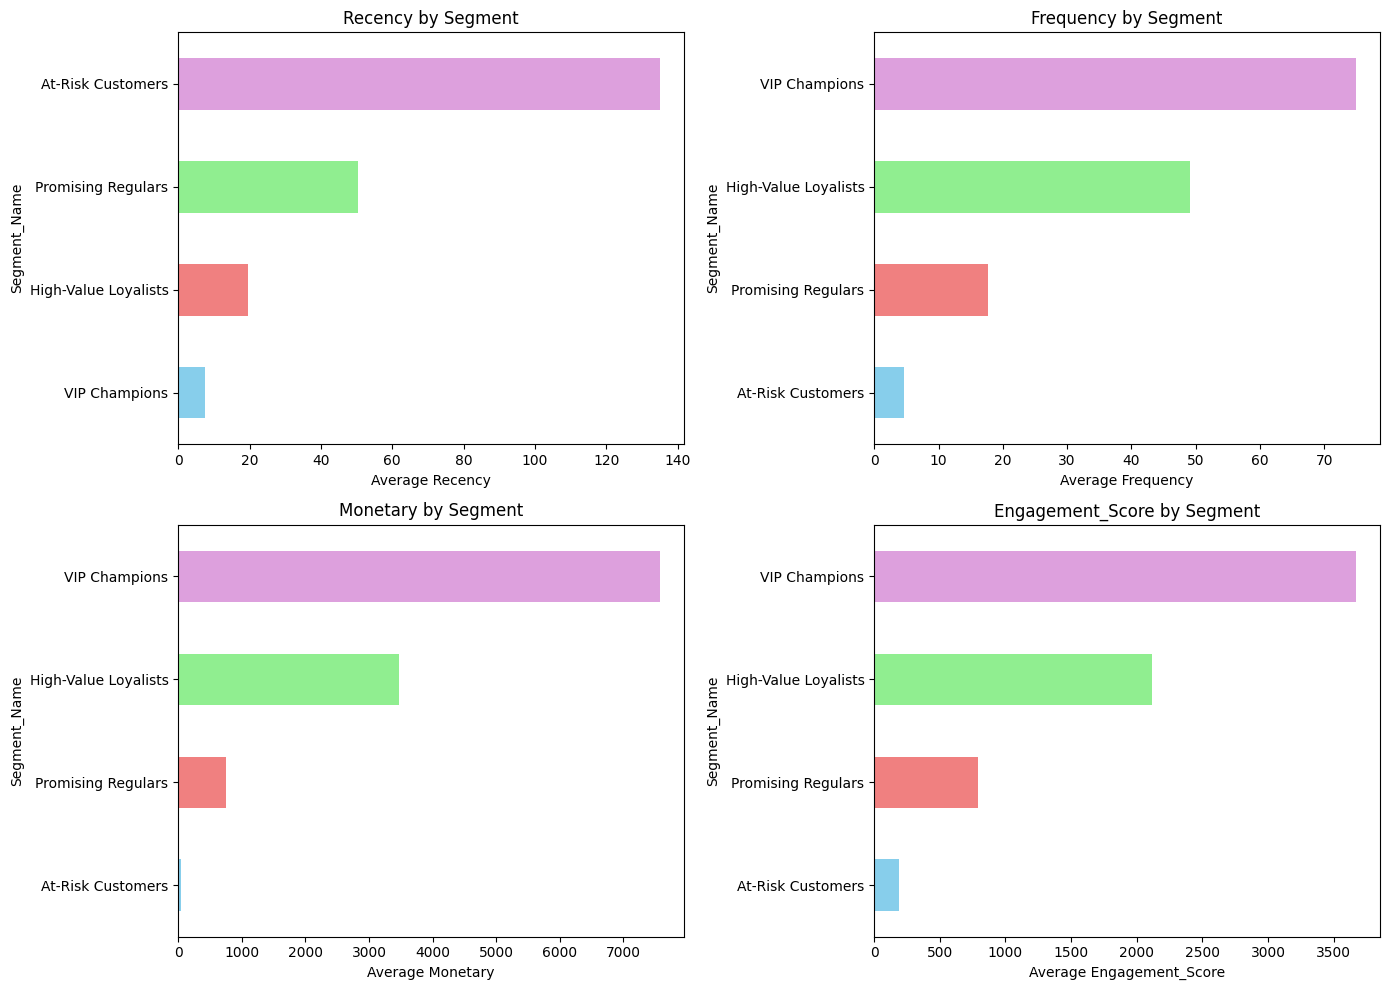

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

metrics = ['Recency', 'Frequency', 'Monetary', 'Engagement_Score']
colors_bar = ['skyblue', 'lightcoral', 'lightgreen', 'plum']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    segment_avg = df.groupby('Segment_Name')[metric].mean().sort_values()
    segment_avg.plot(kind='barh', ax=ax, color=colors_bar)
    ax.set_xlabel(f'Average {metric}')
    ax.set_title(f'{metric} by Segment')

plt.tight_layout()
plt.savefig("images/segment_comparison.png", dpi=300, bbox_inches='tight')
plt.show()

## 5. Engagement Levels Across Segments

Understanding how engagement varies within each customer segment.

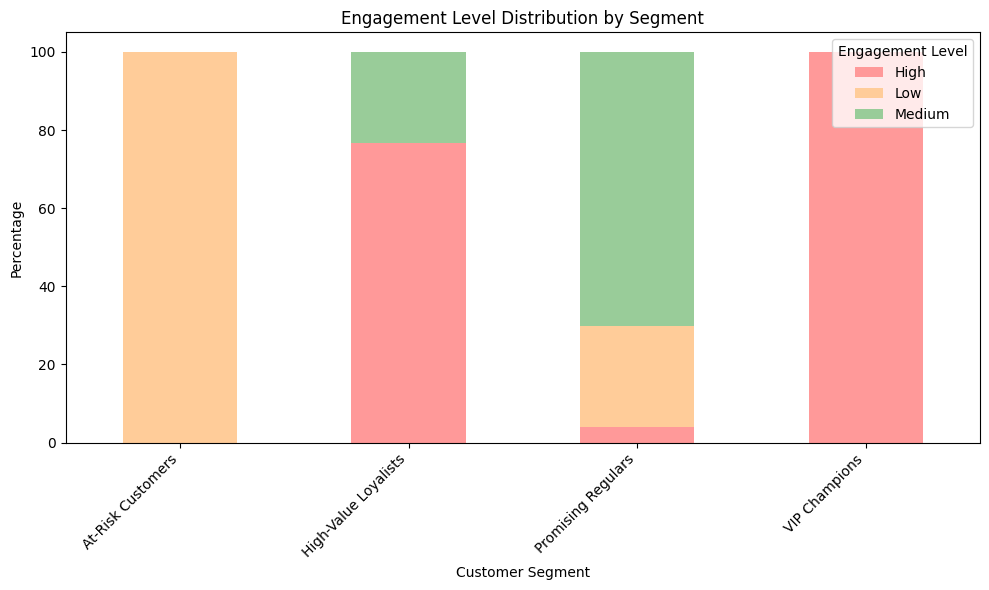

In [ ]:
engagement_by_segment = pd.crosstab(df['Segment_Name'], df['Engagement_Level'], normalize='index') * 100

engagement_by_segment.plot(kind='bar', stacked=True, figsize=(10, 6), 
                           color=['#ff9999', '#ffcc99', '#99cc99'])
plt.xlabel('Customer Segment')
plt.ylabel('Percentage')
plt.title('Engagement Level Distribution by Segment')
plt.legend(title='Engagement Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("images/engagement_by_segment.png", dpi=300, bbox_inches='tight')
plt.show()

<br>
<br>

---
---

# Part 6: Business Insights & Recommendations

Translating our analysis into actionable strategies for each customer segment.

---

## Key Findings

Our analysis identified four distinct customer segments with different behaviors and value profiles:

1. **VIP Champions (973 customers, 9.7%)**: Our highest-value segment with extremely recent purchases (7.5 days), very high frequency (75 purchases), and the highest spend ($7,574). These customers also show the highest engagement scores and lowest cart abandonment rates.

2. **High-Value Loyalists (2,190 customers, 21.9%)**: Strong performers with recent activity (19.5 days), high purchase frequency (49 purchases), and substantial spending ($3,465). High engagement and low cart abandonment indicate strong brand loyalty.

3. **Promising Regulars (1,082 customers, 10.8%)**: Mid-tier customers with moderate recency (50 days), frequency (18 purchases), and spending ($755). This segment shows potential for growth with the right interventions.

4. **At-Risk Customers (5,755 customers, 57.6%)**: Our largest segment but lowest value. High recency (135 days), minimal purchases (4.6), and low spend ($49) indicate disengagement. Also shows high cart abandonment (35%) and return rates (11.8).

## Recommended Actions by Segment

### VIP Champions
**Strategy**: Retain and reward
- Implement VIP loyalty program with exclusive perks
- Provide early access to new products
- Assign dedicated account managers
- Send personalized thank-you communications
- **Expected Impact**: Maintain high retention and increase lifetime value

### High-Value Loyalists  
**Strategy**: Deepen engagement
- Offer tiered rewards program to incentivize increased spending
- Cross-sell and upsell premium products
- Request reviews and referrals
- Create brand ambassador opportunities
- **Expected Impact**: Move more customers into VIP tier

### Promising Regulars
**Strategy**: Accelerate growth
- Send targeted campaigns with product recommendations based on browsing history
- Offer bundle deals to increase order value
- Implement cart abandonment recovery emails
- Provide limited-time promotions to increase purchase frequency
- **Expected Impact**: Convert to High-Value Loyalists within 6 months

### At-Risk Customers
**Strategy**: Re-engage or optimize spend
- Launch win-back campaigns with special discounts
- Send surveys to understand drop-off reasons
- Reduce marketing spend on consistently unresponsive customers
- A/B test different messaging and incentives
- **Expected Impact**: Reactivate 10-15% while reducing waste on unresponsive customers

## Immediate Priority Actions

Based on segment size and potential impact:

1. **Focus on At-Risk Recovery**: With 57.6% of customers in this segment, even a 10% reactivation represents significant revenue opportunity

2. **Protect VIP Revenue**: These 973 customers likely generate a disproportionate share of revenue - retention here is critical

3. **Grow the Middle**: The 1,082 Promising Regulars show potential - targeted campaigns could efficiently move them up-tier

4. **Leverage Loyalists**: Use this segment for referrals and testimonials to acquire similar high-value customers

## Next Steps for Implementation

1. **Export segment assignments** to marketing automation platform
2. **Set up automated campaigns** for each segment with appropriate messaging
3. **Track segment migration** monthly to measure campaign effectiveness  
4. **Calculate segment-specific CLV** to inform customer acquisition costs
5. **Re-run segmentation quarterly** to identify customers moving between segments

In [ ]:
df.to_csv("data/ecommerce_segmented_customers.csv", index=False)
print(f"Final segmented dataset saved with {df.shape[0]} customers")
print(f"\nColumns included: {list(df.columns)}")

Final segmented dataset saved with 10000 customers

Columns included: ['Customer_ID', 'Recency', 'Frequency', 'Monetary', 'Avg_Order_Value', 'Session_Count', 'Avg_Session_Duration', 'Pages_Viewed', 'Clicks', 'Campaign_Response', 'Wishlist_Adds', 'Cart_Abandon_Rate', 'Returns', 'Segment_Label', 'Engagement_Score', 'Engagement_Level', 'Cluster', 'Segment_Name']
